# Orbit Integrations (and more)
Jack Hong

In [1]:
from __future__ import division
from galpy.orbit import Orbit
from galpy.potential import SpiralArmsPotential, MWPotential2014
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from galpy.potential import evaluateDensities

def rel_den_perturbation(amp, Rs=0.3, H=0.0125, r_ref=1, omega=0.3):
    sp = SpiralArmsPotential(amp=amp, Rs=Rs, H=H, r_ref=r_ref, omega=omega)
    mp = MWPotential2014
    pot = [sp] + mp
    R = np.linspace(.01, 1)
    nphis = 100
    phis = np.linspace(0, np.pi, nphis)
    r = np.zeros(len(R))
    counter = 0
    for Rn in R:
        sp_dens = np.zeros(nphis)
        for kk in range(nphis):       
            sp_dens[kk] = evaluateDensities(pot, Rn, 0, phis[kk])
            
        mp_dens = evaluateDensities(mp, Rn, 0)
        r[counter] = np.max(sp_dens) / mp_dens
        counter = counter + 1
            
    avg = np.mean(r)
    stddev = np.std(r)
    return avg, stddev, r

rel_den_perturbation(2)

(1.2725001166468874,
 0.049298309743725337,
 array([ 1.03157021,  1.13086049,  1.18935834,  1.21710299,  1.23014033,
         1.2367128 ,  1.24017978,  1.24266127,  1.24466246,  1.24667874,
         1.24902574,  1.25154976,  1.25441964,  1.25766609,  1.2611871 ,
         1.26481413,  1.26863412,  1.27245166,  1.27638979,  1.28021484,
         1.28403299,  1.28758127,  1.29113946,  1.29439225,  1.29759934,
         1.30039194,  1.30293396,  1.30521845,  1.30706349,  1.30875387,
         1.30998775,  1.31089495,  1.31149539,  1.31171906,  1.31146104,
         1.31112252,  1.31026556,  1.30901451,  1.3075902 ,  1.3058057 ,
         1.30366323,  1.30137894,  1.29877892,  1.29578628,  1.29266641,
         1.28921976,  1.28566083,  1.2817562 ,  1.27774084,  1.27361045]))

In [3]:
sp = SpiralArmsPotential(amp=2, omega=0.1, Cs=[1])
mp = MWPotential2014
pot = [sp] + mp

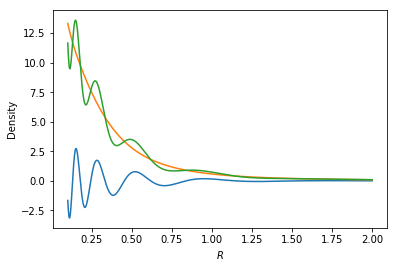

In [4]:
R = np.linspace(0.1, 2, 1000)
sp_dens = np.zeros(R.size)
mp_dens = np.zeros(R.size)

for k in range(len(R)):
    sp_dens[k] = evaluateDensities(sp, R[k], 0, 0)
    mp_dens[k] = evaluateDensities(mp, R[k], 0)
        
plt.plot(R, sp_dens, label='SpiralArmsPotential')
plt.plot(R, mp_dens, label='MWPotential2014')
plt.plot(R, mp_dens+sp_dens, label='SpiralArmsPotential + MWPotential2014')
plt.xlabel("$R$")
plt.ylabel("Density")
plt.show()

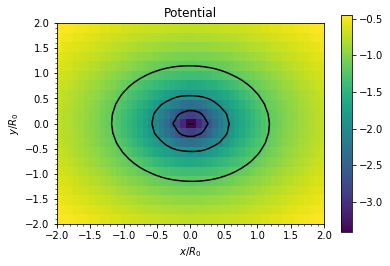

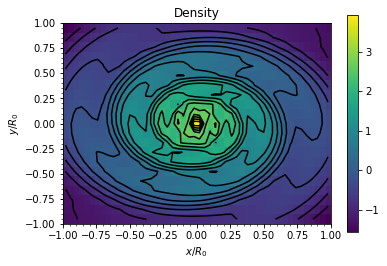

In [5]:
from galpy.potential import plotPotentials, plotDensities
pot_plt = plotPotentials(pot, xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=5, nrs=50)
pot_plt.colorbar = plt.colorbar(pot_plt)
pot_plt.set_cmap('viridis')
plt.title('Potential')

den_plt = plotDensities(pot, xy=True, rmin=-1, rmax=1, zmin=-1, zmax=1, ncontours=21, nrs=50, log=True)
den_plt.colorbar = plt.colorbar(den_plt)
den_plt.set_cmap('viridis')
plt.title('Density')
plt.show()

## Plot rotation curves

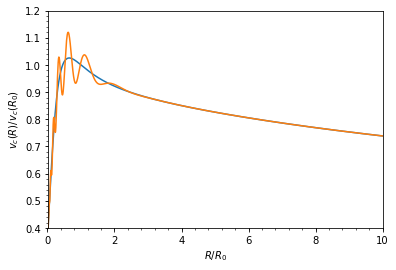

In [6]:
from galpy.potential import plotRotcurve
plotRotcurve(mp, Rrange=[0.01,10.], grid=1001, yrange=[0.4,1.2])
plotRotcurve(pot, Rrange=[0.01,10.], grid=1001, phi=0, yrange=[0.4,1.2], overplot=True)

plt.show()

## Test C and Python give same orbits

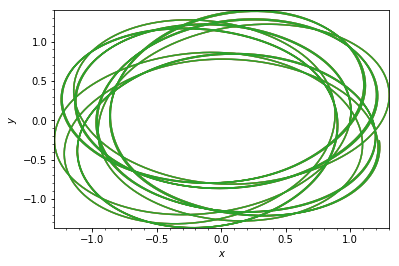

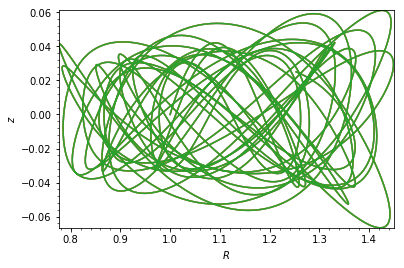

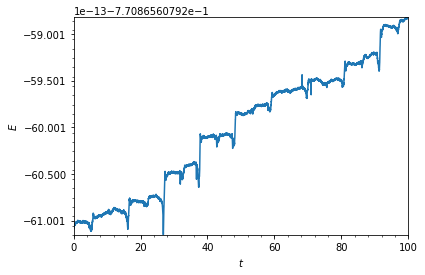

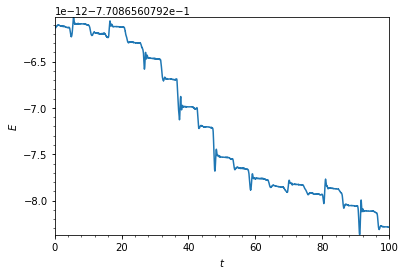

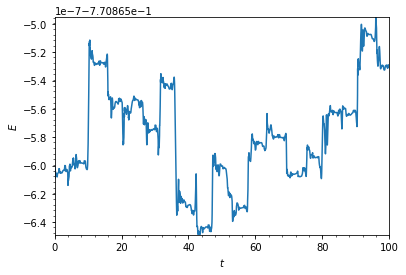

In [19]:
sp = SpiralArmsPotential(amp=2, omega=0, Cs=[1])
mp = MWPotential2014
pot = [sp] + mp

orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
orb2 = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
orb3 = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])

ts = np.linspace(0,100,10000)
orb.integrate(ts, pot, method='rk6_c')
orb2.integrate(ts, pot, method='dopr54_c')
orb3.integrate(ts, pot, method='odeint')

orb.plot(d1='x', d2='y')
orb2.plot(d1='x', d2='y', overplot=True)
orb3.plot(d1='x', d2='y', overplot=True)

orb.plot()
orb2.plot(overplot=True)
orb3.plot(overplot=True)

orb.plotE()
orb2.plotE()
orb3.plotE()

plt.show()

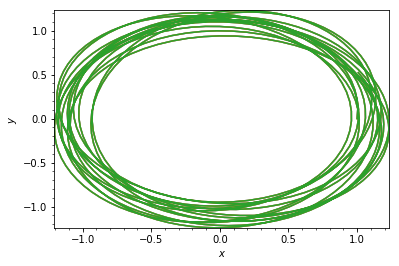

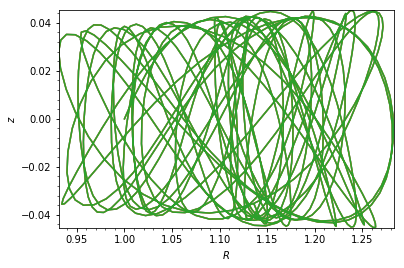

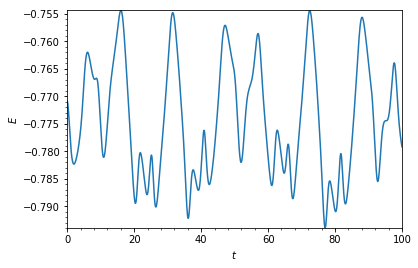

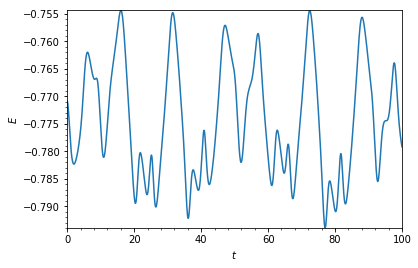

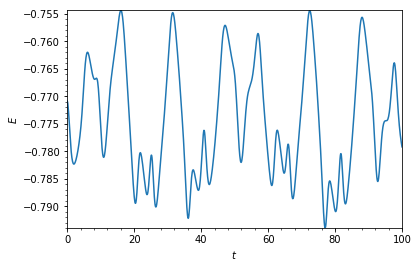

In [20]:
sp = SpiralArmsPotential(amp=2, omega=0.5, Cs=[1])
mp = MWPotential2014
pot = [sp] + mp

orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
orb2 = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
orb3 = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])

ts = np.linspace(0,100,1000)
orb.integrate(ts, pot, method='rk6_c')
orb2.integrate(ts, pot, method='dopr54_c')
orb3.integrate(ts, pot, method='odeint')

orb.plot(d1='x', d2='y')
orb2.plot(d1='x', d2='y', overplot=True)
orb3.plot(d1='x', d2='y', overplot=True)

orb.plot()
orb2.plot(overplot=True)
orb3.plot(overplot=True)

orb.plotE()
orb2.plotE()
orb3.plotE()

plt.show()

## Test run times

In [21]:
sp = SpiralArmsPotential(amp=2, omega=0, Cs=[1])
mp = MWPotential2014
pot = [sp] + mp

ts = np.linspace(0, 100, 10000)

In [22]:
timeit(orb.integrate(ts, pot, method='dopr54_c'))

10 loops, best of 3: 133 ms per loop


In [23]:
timeit(orb.integrate(ts, pot, method='rk4_c'))

10 loops, best of 3: 173 ms per loop


In [24]:
timeit(orb.integrate(ts, pot, method='rk6_c'))

10 loops, best of 3: 157 ms per loop


In [25]:
timeit(orb.integrate(ts, pot, method='symplec4_c'))

10 loops, best of 3: 144 ms per loop


In [26]:
timeit(orb.integrate(ts, pot, method='symplec6_c'))

10 loops, best of 3: 151 ms per loop


In [27]:
timeit(orb.integrate(ts, pot, method='odeint'))

1 loop, best of 3: 1.5 s per loop


## Integrate orbits at R=1 on a grid of vR from -0.5 to 0.5 and vT from 0.5 to 1.5. Fix z=0 and vz = 0.07.

In [28]:
def plot_orbit_int_results(mp_rperis, mp_rapos, mp_es, mp_zmaxs, sp_rperis, sp_rapos, sp_es, sp_zmaxs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_rperis, extent=[-0.5, 0.5, 0.5, 1.5])
    ax1.set_title('Pericenter radii for MWPotential2014', fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_rperis, extent=[-0.5, 0.5, 0.5, 1.5])
    ax2.set_title('Pericenter radii for SpiralArmsPotential + MWPotential2014', fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_rapos, extent=[-0.5, 0.5, 0.5, 1.5])
    ax1.set_title('Apocenter radii for MWPotential2014', fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_rapos, extent=[-0.5, 0.5, 0.5, 1.5])
    ax2.set_title('Apocenter radii for SpiralArmsPotential + MWPotential2014', fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_es, extent=[-0.5, 0.5, 0.5, 1.5])
    ax1.set_title('Eccentricities for MWPotential2014', fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_es, extent=[-0.5, 0.5, 0.5, 1.5])
    ax2.set_title('Eccentricities for SpiralArmsPotential + MWPotential2014', fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_zmaxs, extent=[-0.5, 0.5, 0.5, 1.5])
    ax1.set_title('z max for MWPotential2014', fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_zmaxs, extent=[-0.5, 0.5, 0.5, 1.5])
    ax2.set_title('z max for SpiralArmsPotential + MWPotential2014', fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    plt.show()

In [29]:
def integrate_orbits(omega):
    R, z, phi = 1, 0, 0
    amp = 2
    nvRs, nvTs = 50, 50
    vRs = np.linspace(-0.5, 0.5, nvRs)
    vTs = np.linspace(0.5, 1.5, nvTs)
    vz = 0.07

    ts = np.linspace(0, 100, 10000)

    # MWPotential2014 only
    mp_rperis = np.empty((nvRs, nvTs))  # pericenter radii
    mp_rapos = np.empty((nvRs, nvTs))  # apocenter radii
    mp_es = np.empty((nvRs, nvTs))  # eccentricities
    mp_zmaxs = np.empty((nvRs, nvTs))  # zmax

    # MWPotential2014 + SpiralArmsPotential
    sp_rperis = np.empty((nvRs, nvTs))  # pericenter radii
    sp_rapos = np.empty((nvRs, nvTs))  # apocenter radii
    sp_es = np.empty((nvRs, nvTs))  # eccentricities
    sp_zmaxs = np.empty((nvRs, nvTs))  # zmax

    sp = [SpiralArmsPotential(amp=amp, omega=omega)] + mp
    for ii in range(nvRs):
        for jj in range(nvTs):
            o = Orbit(vxvv=[R, vRs[ii], vTs[jj], z, vz, phi])
            o.integrate(ts, mp, method='rk6_c')
            mp_rperis[ii, jj] = o.rperi()
            mp_rapos[ii, jj] = o.rap()
            mp_es[ii, jj] = o.e()
            mp_zmaxs[ii, jj] = o.zmax()

            o.integrate(ts, sp, method='rk6_c')
            sp_rperis[ii, jj] = o.rperi()
            sp_rapos[ii, jj] = o.rap()
            sp_es[ii, jj] = o.e()
            sp_zmaxs[ii, jj] = o.zmax()

    plot_orbit_int_results(mp_rperis, mp_rapos, mp_es, mp_zmaxs, sp_rperis, sp_rapos, sp_es, sp_zmaxs)

## Omega =0

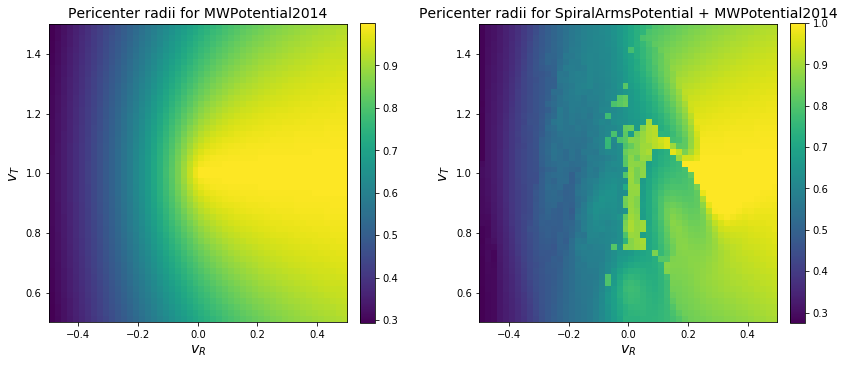

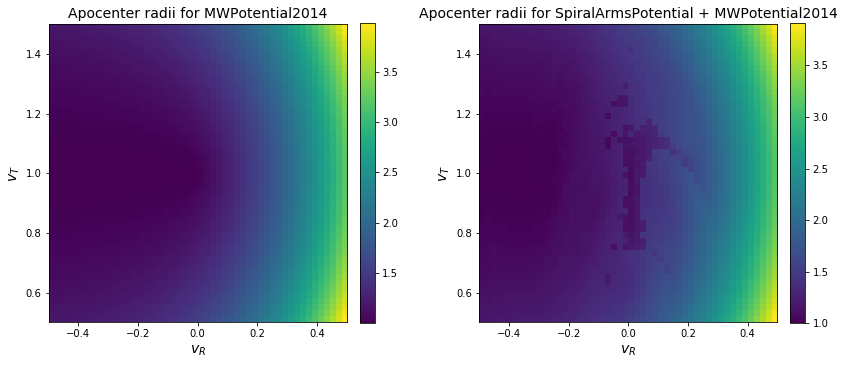

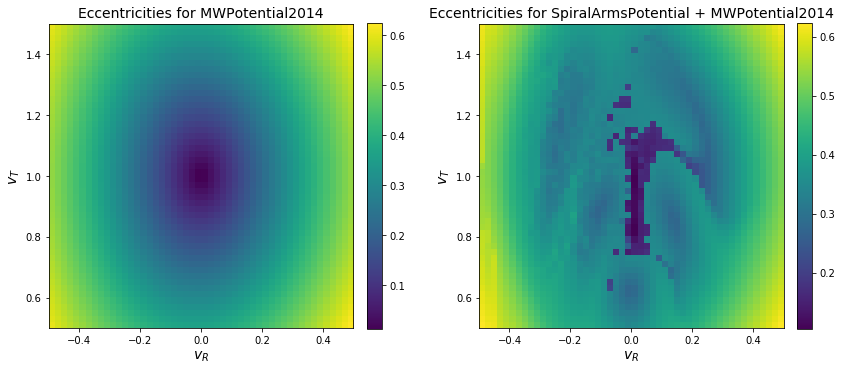

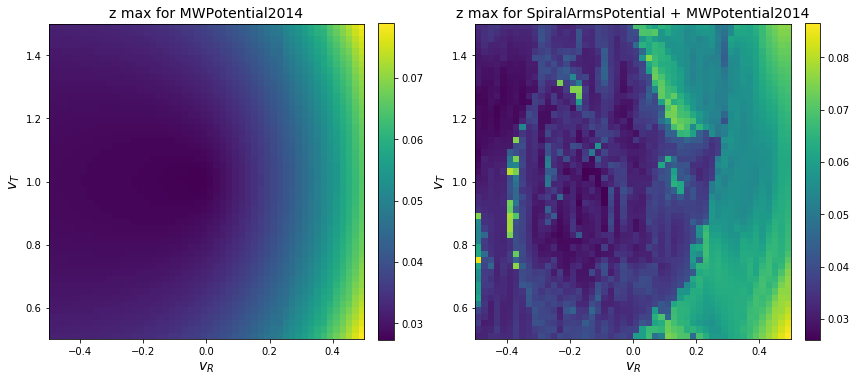

In [30]:
integrate_orbits(0)

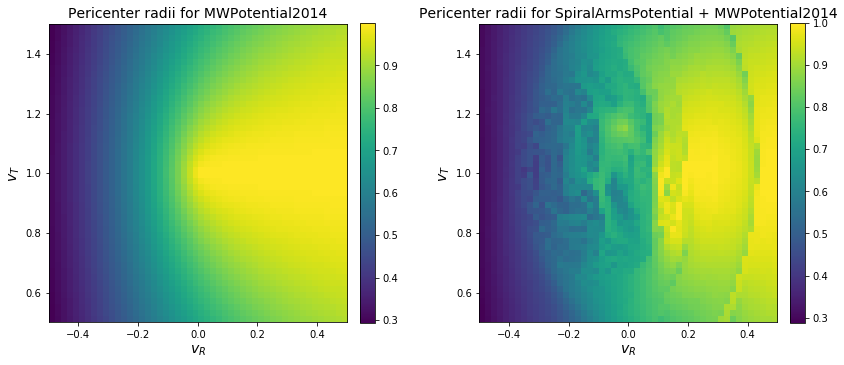

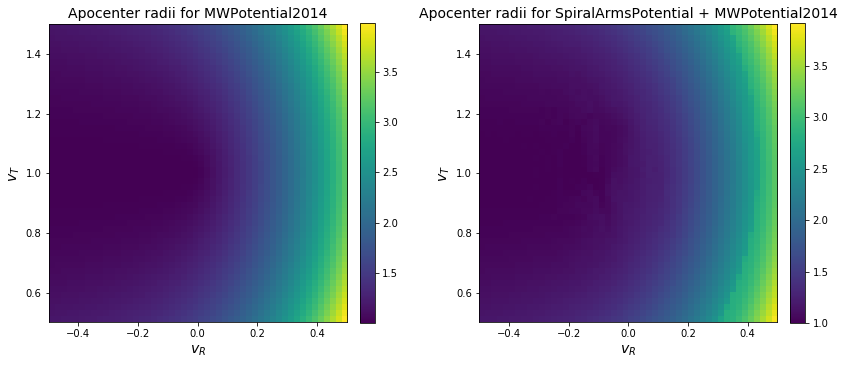

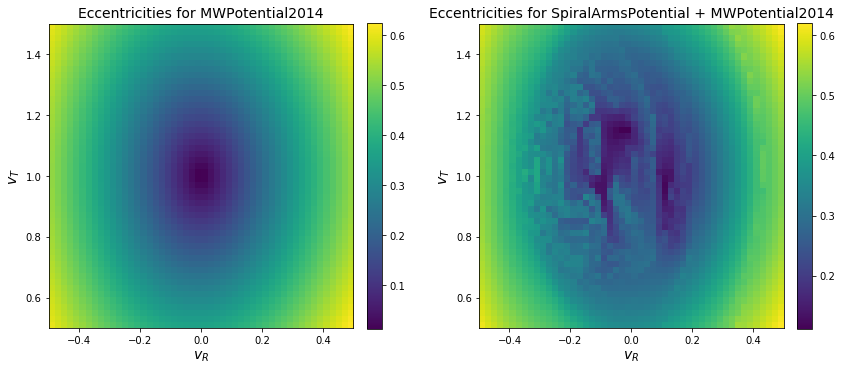

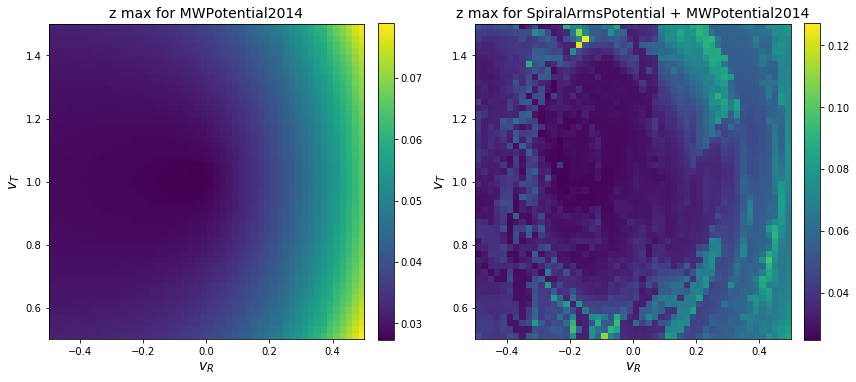

In [31]:
integrate_orbits(0.5)

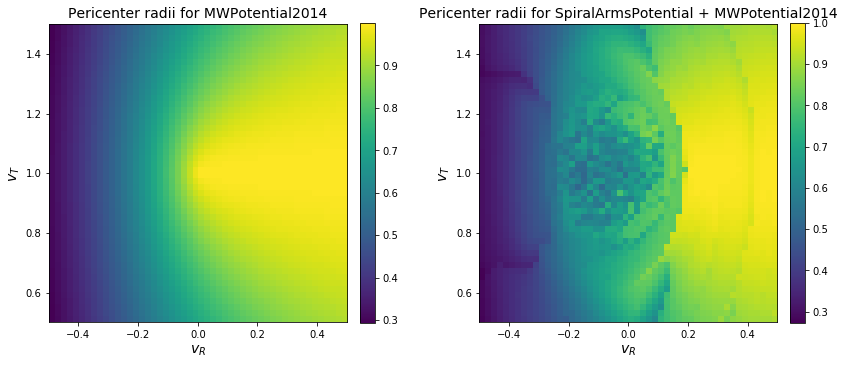

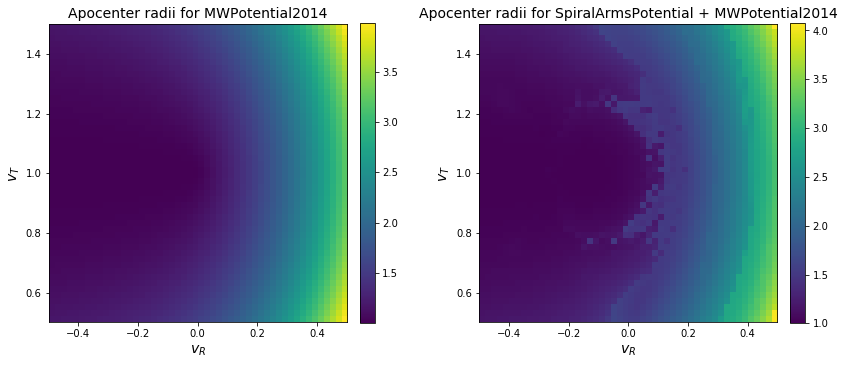

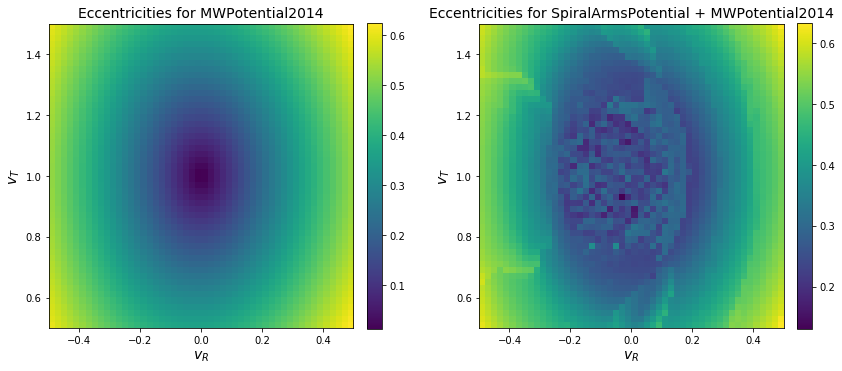

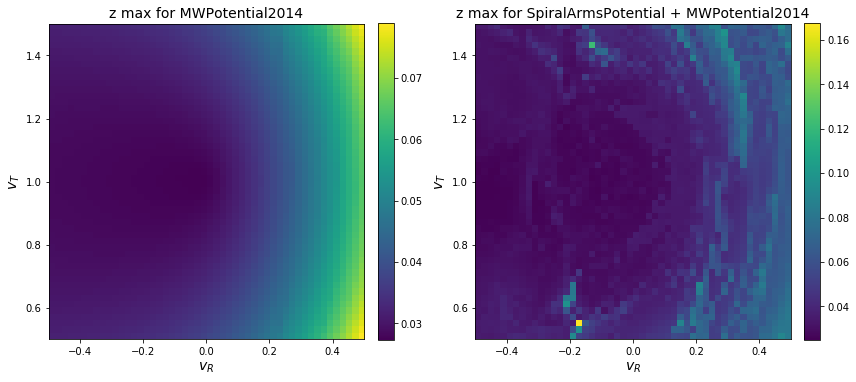

In [32]:
integrate_orbits(0.85)

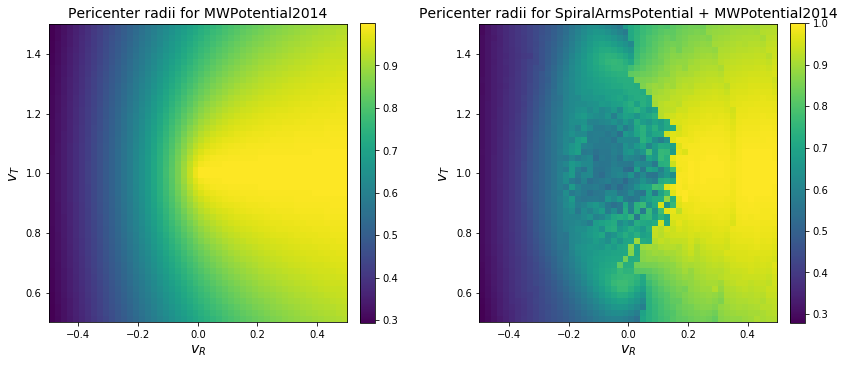

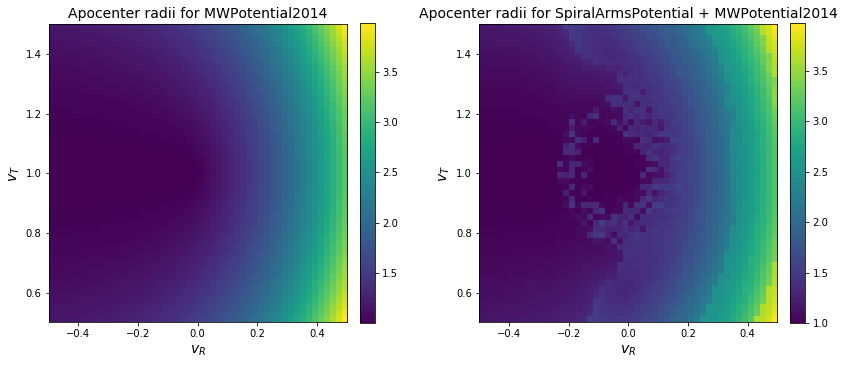

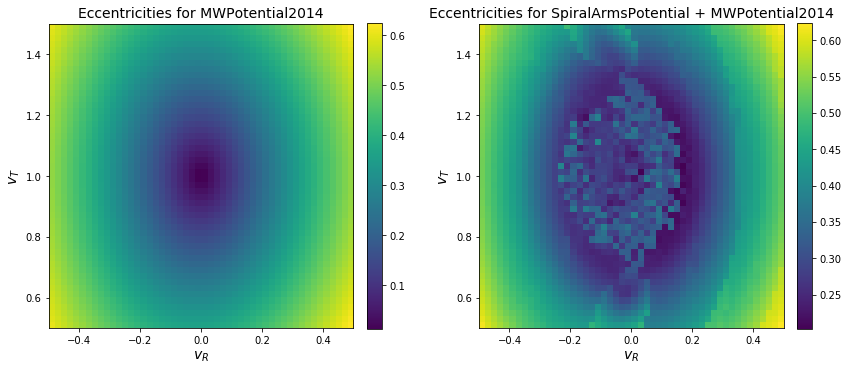

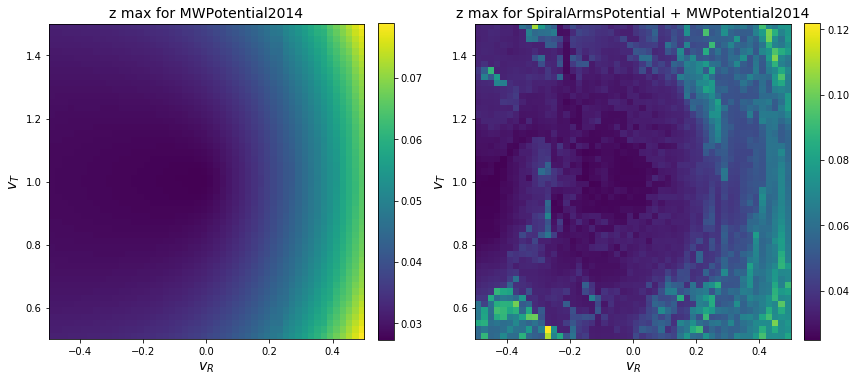

In [33]:
integrate_orbits(0.95)

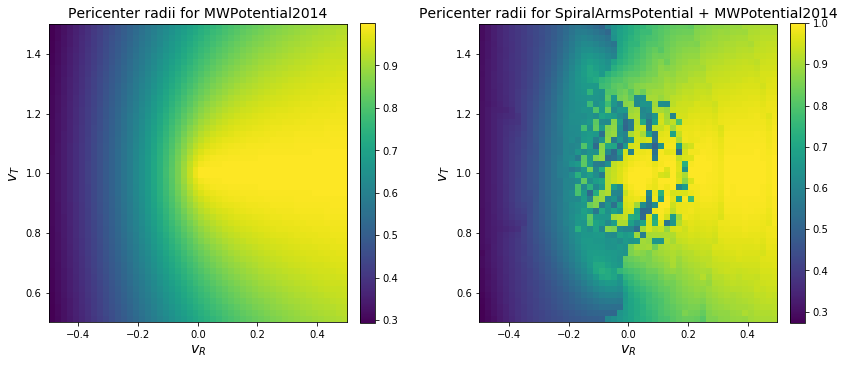

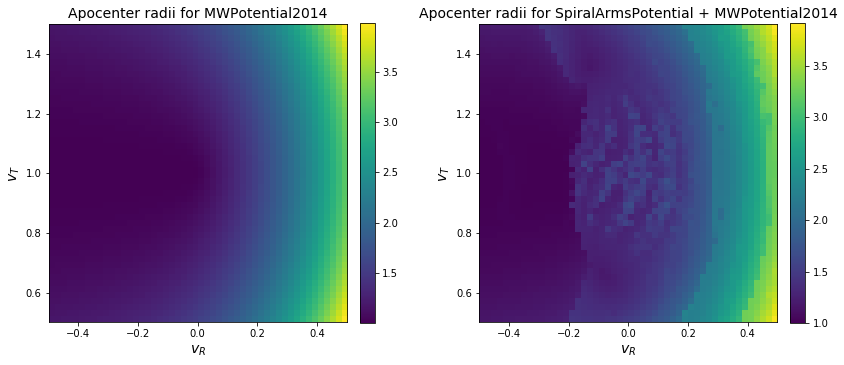

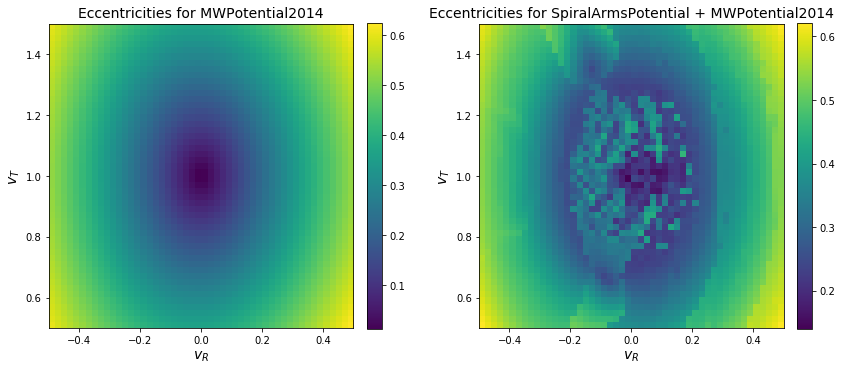

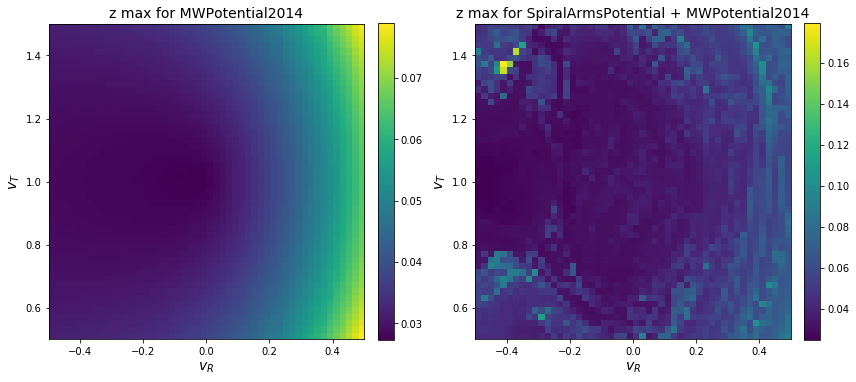

In [34]:
integrate_orbits(1.05)

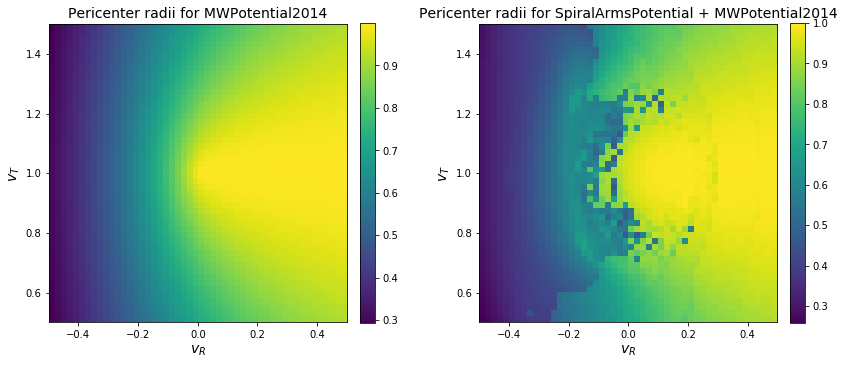

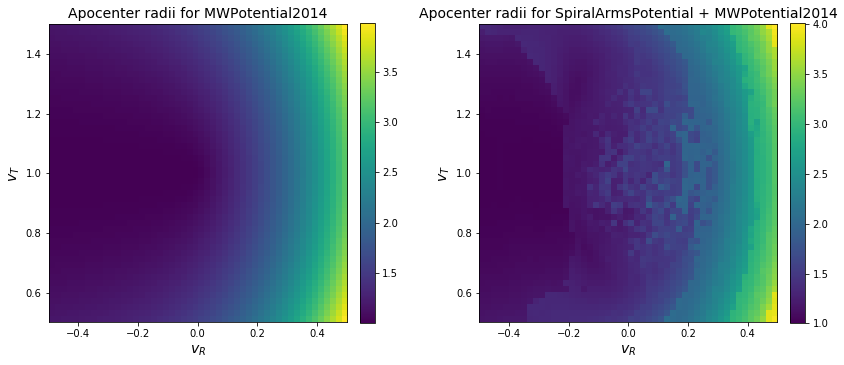

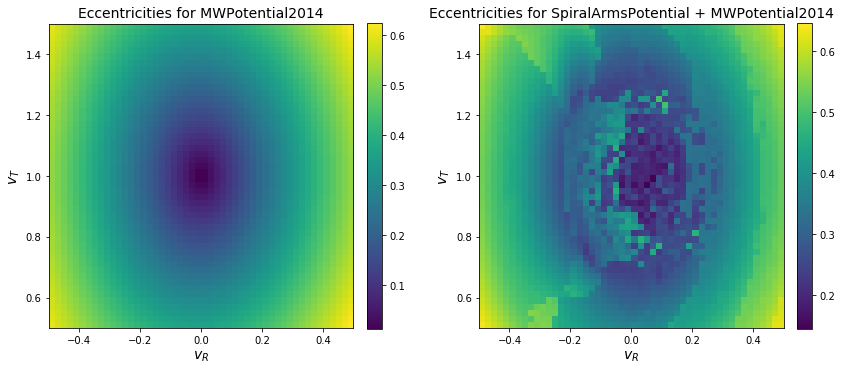

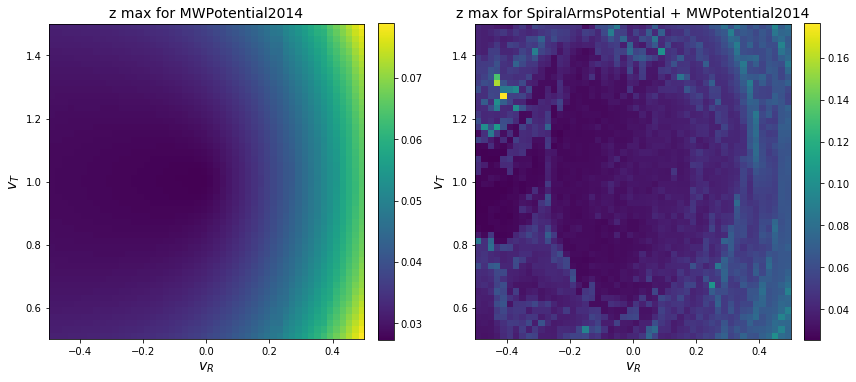

In [35]:
integrate_orbits(1.15)

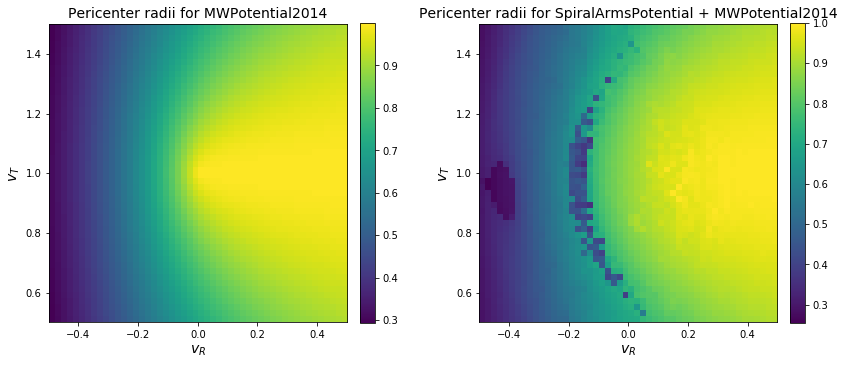

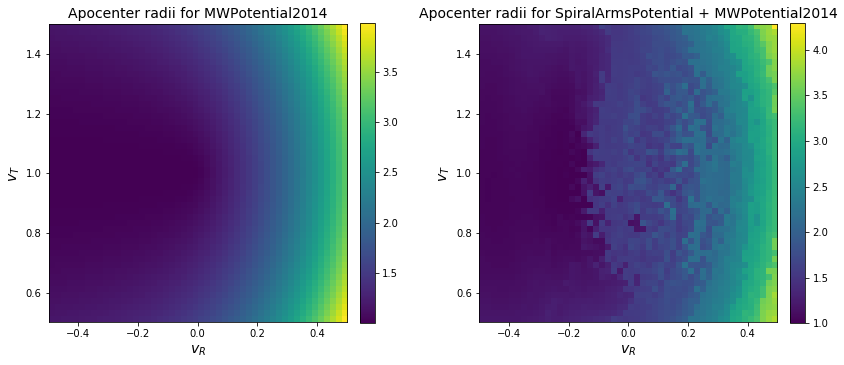

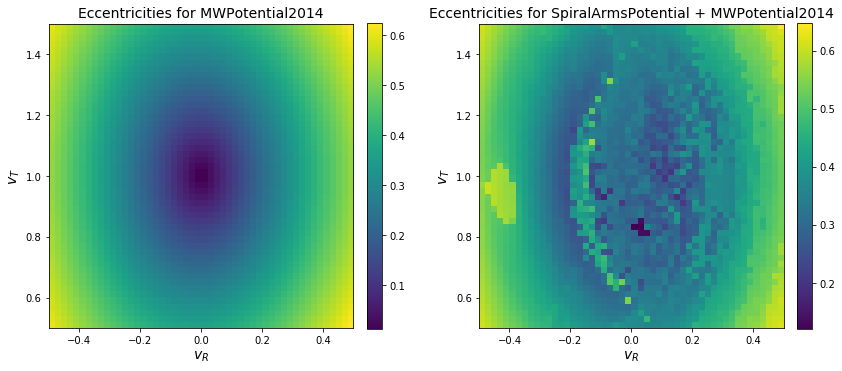

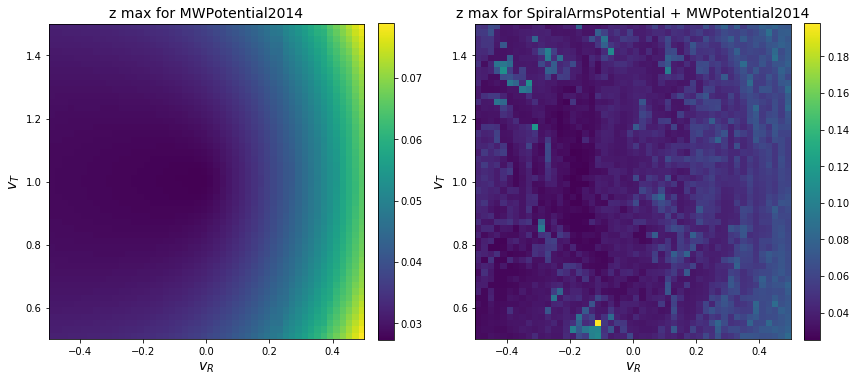

In [36]:
integrate_orbits(1.5)